# В данном юните вы решите задачу сегментации подростков по их интересам. 
Набор данных представляет собой случайную выборку из 30 000 американских старшеклассников, у которых в 2006 году были профили в одной известной социальной сети, название которой авторы датасета не раскрывают в целях сохранения анонимности. Данные были отобраны равномерно для четырёх разных возрастов (предполагаемый год окончания школы — 2006–2009).

In [66]:
# для автозагрузки изменений в модулях без необходимости перезагрузки kelner
%load_ext autoreload
%autoreload 2

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# необходимо для корректного импорта своих модулей в JupyterLab
import sys
current_dir = sys.path[0]
project_dir = 'SF_DS_Pro'
last_position = current_dir.find(project_dir) + len(project_dir)
project_path = current_dir[:last_position]
sys.path.append(project_path)

import Handlers as hd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn import set_config
set_config(transform_output='pandas')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

sns.set_theme('notebook') 
sns.set_palette('Set2')

plt.rcParams['figure.figsize'] = (12, 8) 

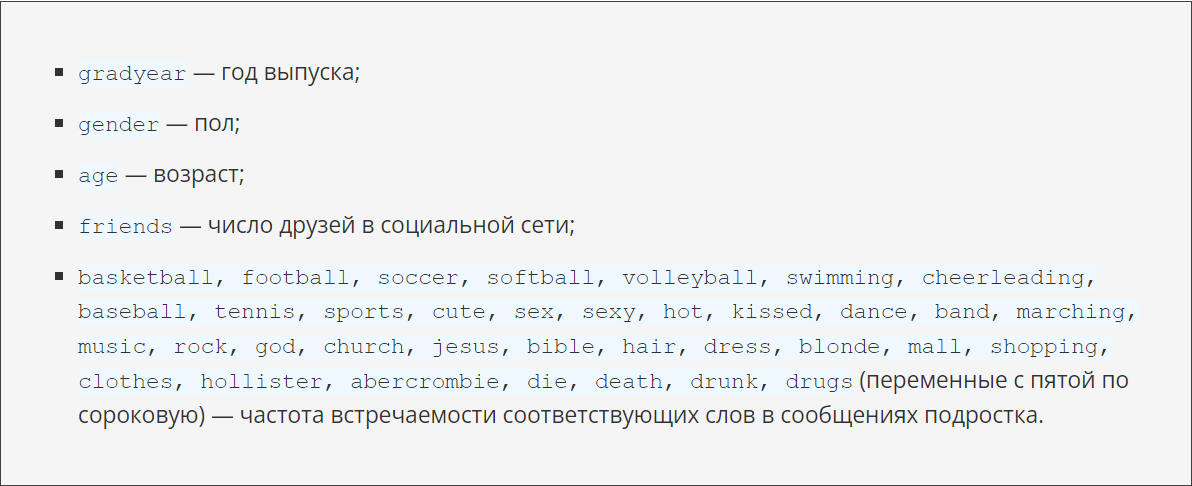

In [93]:
df = pd.read_csv('data/snsdata.zip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [94]:
df.drop(columns=['gradyear', 'gender', 'age', 'friends'], inplace=True)
df.shape

(30000, 36)

In [95]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [96]:
X.iloc[0, 0].round(2)

-0.33

In [97]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=9, random_state=42)
model.fit(X)
model.inertia_

857169.1033997787

In [98]:
pd.Series(model.labels_).value_counts()

0    19659
3     4490
7     2098
1      930
4      851
6      762
8      716
5      493
2        1
Name: count, dtype: int64

Задание 4.5

1. Мы выделили девять кластеров, но, возможно, это далеко не оптимальное количество. Давайте попробуем применить разные методы для нахождения числа кластеров. Будем выбирать количество кластеров из диапазона от 3 до 9.

Для начала примените метод локтя. Каким в этом случае будет оптимальное число кластеров? Если оно не идентифицируется однозначно, запишите количество кластеров, при котором достигается наименьшая инерция.

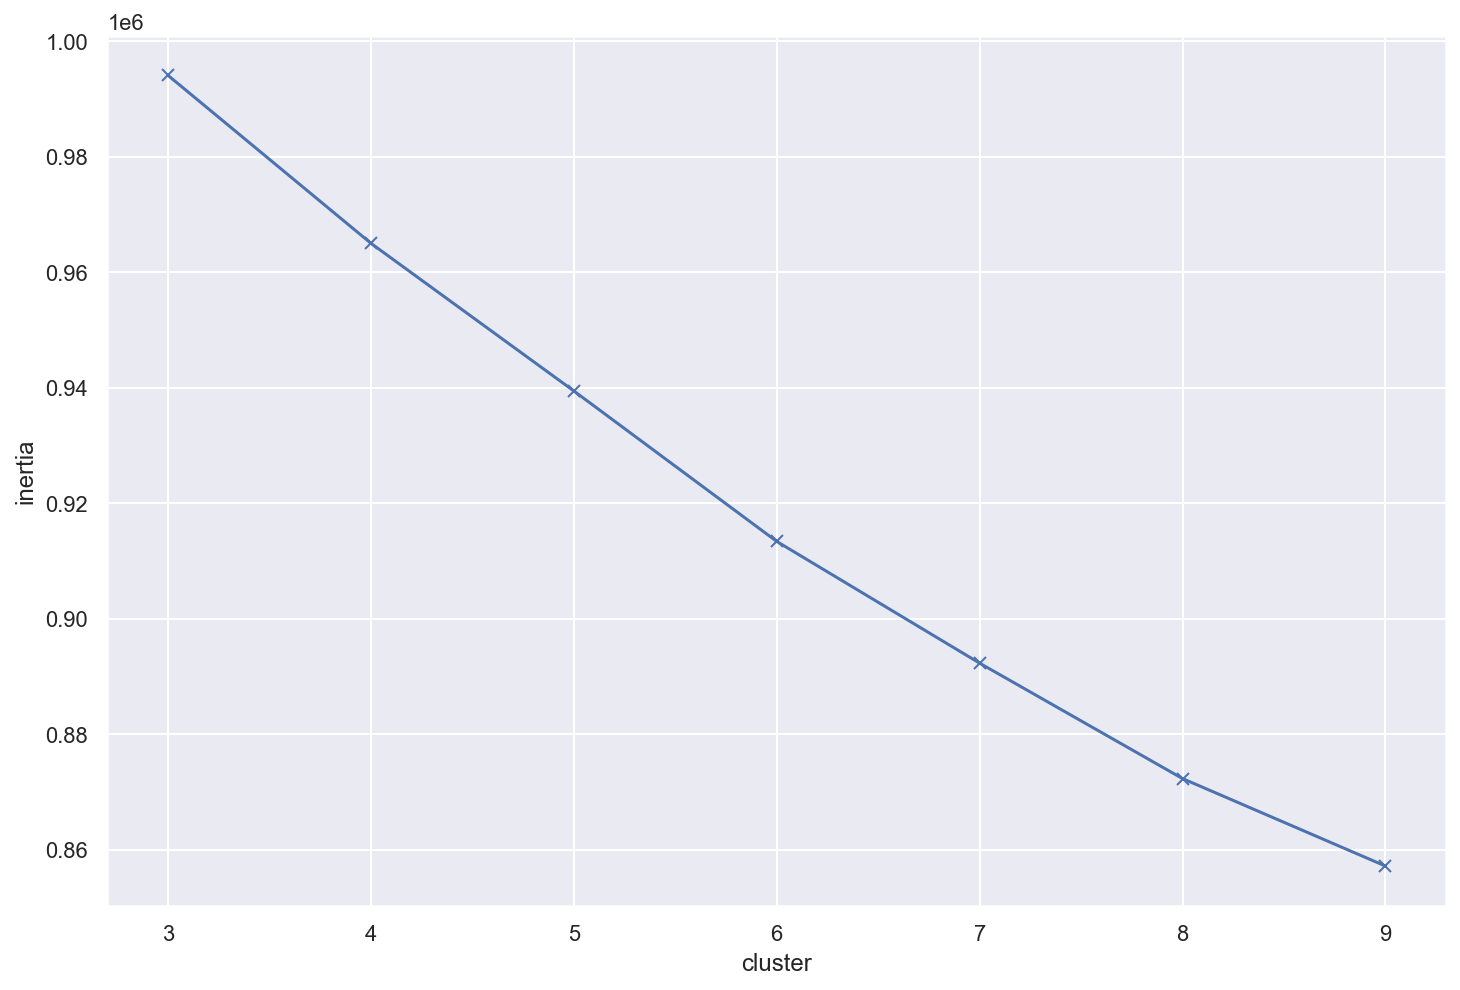

In [44]:
def get_inertia(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    return k_means.inertia_

# создаём пустой список для значений инерции
inertia = []
cluster_list = list(range(3, 10))

for cluster_num in cluster_list:
    # сохраняем значения
    inertia.append(get_inertia(cluster_num, X))
    
# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot(cluster_list, inertia, 'xb-');


2. Теперь попробуйте подобрать оптимальное количество кластеров с помощью коэффициента силуэта. Каким оно будет?

Если невозможно однозначно определить количество кластеров, при котором достигается максимальное значение коэффициента силуэта, выберите наименьшее количество кластеров из подходящих.

Внимание: программа может выполняться несколько минут — будьте готовы подождать.

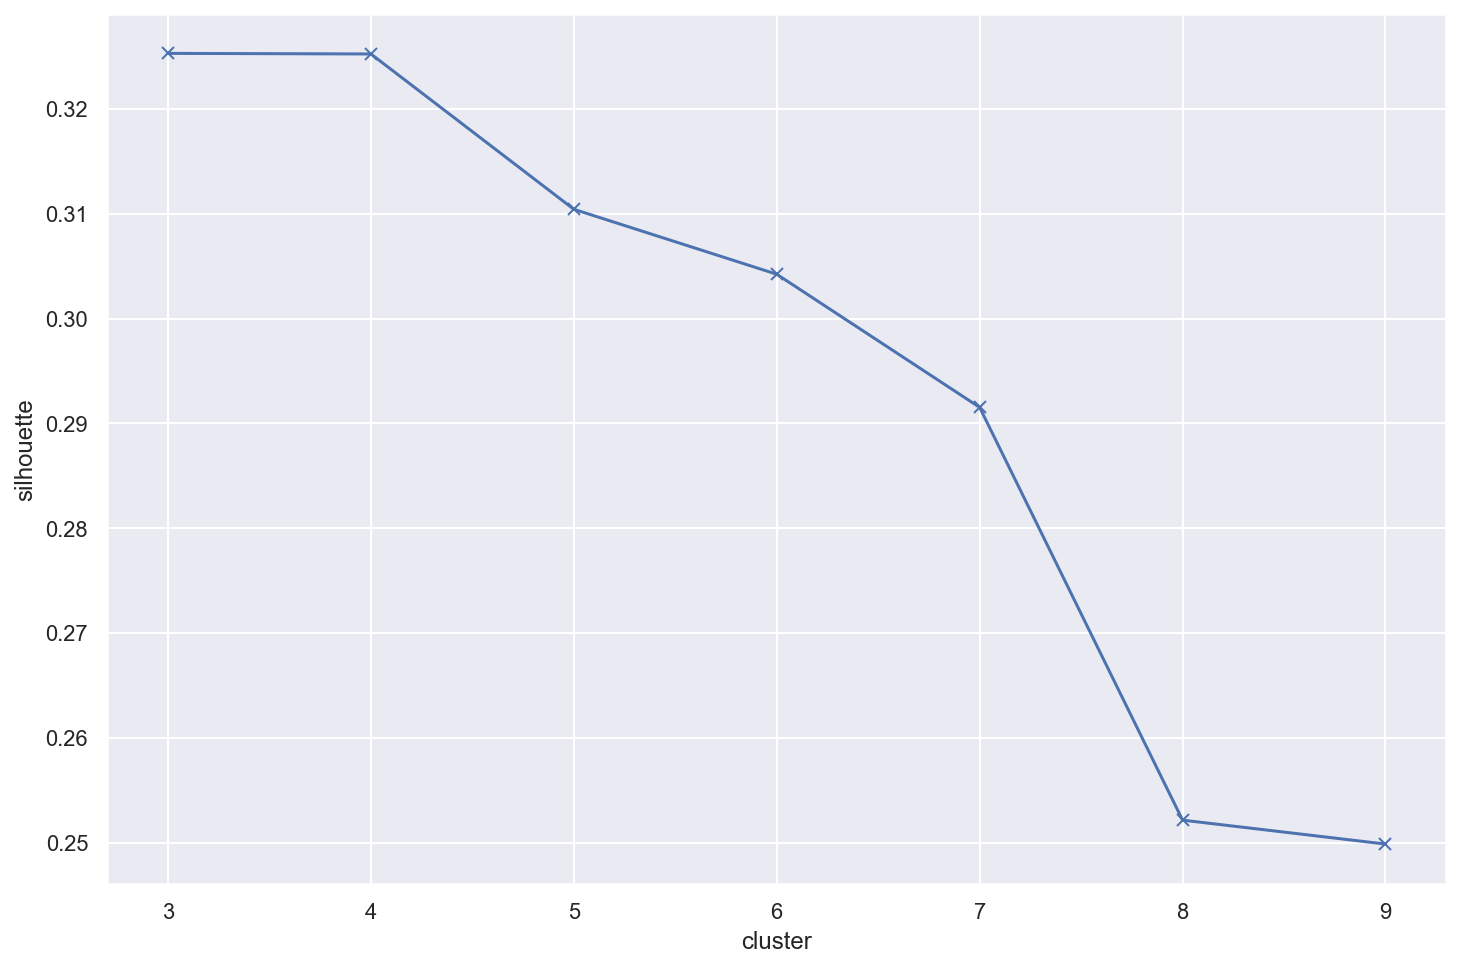

In [43]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчёте метода локтя
def get_silhouette(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    return silhouette_score(X, k_means.labels_)

silhouette = []
cluster_list = list(range(3, 10))

for clust_num in cluster_list:
 silhouette.append(get_silhouette(clust_num, X))
 
# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot(cluster_list, silhouette, 'xb-');


In [60]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [90]:
# Добавляю метки кластеров к исходным данным в виде признака
df['cluster'] = model.labels_
# Группирую данные по кластерами и считаю среднее
group = df.groupby('cluster').mean().T
group

cluster,0,1,2
basketball,0.661839,0.561947,0.150663
football,0.590603,0.523009,0.151361
soccer,0.472718,0.341593,0.152189
softball,0.427417,0.282301,0.086299
volleyball,0.400977,0.207080,0.073216
swimming,0.303301,0.271681,0.083900
cheerleading,0.311553,0.209735,0.048491
baseball,0.245706,0.252212,0.061224
tennis,0.166723,0.143363,0.064015
sports,0.271640,0.530973,0.086604


In [85]:
# Из каждого столбца выбираю топ 10 категорий и сохраняю в множества
set0 = set(group[[0]].sort_values(by=0, ascending=False).index[:10])
set1 = set(group[[1]].sort_values(by=1, ascending=False).index[:10])
set2 = set(group[[2]].sort_values(by=2, ascending=False).index[:10])

In [91]:
# определяю пересечение множеств
set0 & set1 & set2

{'dance', 'god', 'hair', 'music'}

### Задание 4.7
Итак, с k-means мы потренировались — теперь перейдём к EM-алгоритму.

Реализуйте EM-алгоритм (GaussianMixture) для такого же количества кластеров, как и в предыдущем задании. В качестве значения параметра random_state возьмите число 42.

In [103]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3, random_state=42)
model.fit(X)

labels = model.predict(X)
pd.Series(labels).value_counts()

0    23426
1     6573
2        1
Name: count, dtype: int64

In [112]:
df['cluster'] = labels
df[df['cluster'] == 2].mean().sort_values(ascending=False).index[:3].to_list()

['blonde', 'sex', 'hair']